In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'keras-pretrained-models:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2798%2F7251%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T112049Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D840493978a09145fdc1dda1b74e91b725a8cc67c2110e2dab3246f524fe4b6c05e86a56e02b299256fbca1e1e855149c9b1d7d77edbd190eaa7a58699b511e50d6194ba5d74f27f73720bba333841e62664c3dbc98ade0de47b1142e560336b3f87e54a9dce8c99e3b24cf0b2f4458259f3b9d9d6d581952f8264f019c38b4c46488b990ffe477b666ac92c806e23e52f5486331d080f31eccb29a10ded73d79941bca5a9d1b9f55fef7364ed04207cfc5b2c9582c5402beaecc8e7437bf56345a0dc0b15a8dca0dd9b934be792bb956be74c09ba9ceebf361bc129814b8462508051265bf896f757d048aab42ada50c034c1324d3a7c1d08f2b2a46d2920132,image-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F55098%2F107188%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T112049Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D422963265f0fbe260ec6f1cee25a8abff96150180e9e412384d5d514222accafad42b661fd022fe79b03624e4eab2be65e6f98153f37a3ba1d63bcabc6b90197406955548ffe7bd2beed32654042a47bf9765c5a02a2cfba79a7c5043b606e4e15e085954ac419b2f7b7bcee3e4ae7cde25b2786fa776c79e7c9adf262e6b65cbb17798441466b0567d92cbe93f1f2783e161f23b8aeebead1bf4e4051f33a82e268a743e155e7c2228666dd3ea17184613682794191bfe4ffd9fff5f85c7bcf8b25cd7aa14b7a7e42f22b69df58039c7402b8ea2f70780492085ca7e29deda120c8dd888746b3251f83793e57bdf29e8f53de7a3c7f3349a6e75150dc0b934a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 989248706 bytes downloaded
Downloaded and uncompressed: keras-pretrained-models
[==================================================] 2514186873 bytes downloaded
Downloaded and uncompressed: image-classification
Data source import complete.


## Low light Image Enhancement with Convolutional Neural Network.
Image enhancement is one of the modern topics that are discussed now a days and Deep Learning play a major part in it. We see various types of smartPhones with their night mode in camera which help us to take beautiful images at night or low light situation.

The Camera is not able to take the perfect image at low light because of the noise created at the camera sensors. During night mode the noise is cancelled out by the camera to get the perfect image.

![Low Light Image Enhancement](https://www.soyacincau.com/wp-content/uploads/2014/04/140415-ASUS-PixelMaster.jpg)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2 as cv
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input,decode_predictions
from keras import backend as K
from keras.layers import add, Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization, RepeatVector, Reshape
# from keras.layers.merge import concatenate
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
# from tensorflow import set_random_seed
# set_random_seed(2)
# np.random.seed(1)
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['keras-pretrained-models', 'image-classification']


In [4]:
InputPath="../input/image-classification/images/images/art and culture/"

In [5]:
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.0001
        sigma = var**0.05
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy =  gauss + image
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 1.0
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(image.size * s_vs_p)
        coords = [np.random.randint(0, i, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i , int(num_pepper))
              for i in image.shape]
        out[coords] = 1
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)
        noisy = image + image * gauss
        return noisy

## REAL IMAGE

255

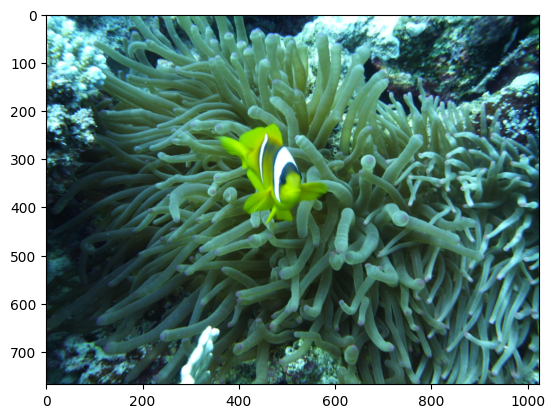

In [26]:
img = cv.imread("/content/download (2).png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
l = img.max()
plt.imshow(img)
l

In [9]:
def PreProcessData(ImagePath):
    X_=[]
    y_=[]
    count=0
    for imageDir in os.listdir(ImagePath):
        if count<2131:
            try:
                count=count+1
                img = cv.imread(ImagePath + imageDir)
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                img_y = cv.resize(img,(500,500))
                hsv = cv.cvtColor(img_y, cv.COLOR_BGR2HSV) #convert it to hsv
                hsv[...,2] = hsv[...,2]*0.2
                img_1 = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
                Noisey_img = noisy("s&p",img_1)
                X_.append(Noisey_img)
                y_.append(img_y)
            except:
                pass
    X_ = np.array(X_)
    y_ = np.array(y_)

    return X_,y_

In [10]:
X_,y_ = PreProcessData(InputPath)

In [11]:
K.clear_session()
def InstantiateModel(in_):

    model_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(in_)
    model_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_1)
    model_1 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_1)

    model_2 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(in_)
    model_2 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)

    model_2_0 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)

    model_add = add([model_1,model_2,model_2_0])

    model_3 = Conv2D(64,(3,3), activation='relu',padding='same',strides=1)(model_add)
    model_3 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_3)
    model_3 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3)

    model_3_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_add)
    model_3_1 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3_1)

    model_3_2 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add)

    model_add_2 = add([model_3_1,model_3_2,model_3])

    model_4 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_2)
    model_4_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add)
    #Extension
    model_add_3 = add([model_4_1,model_add_2,model_4])

    model_5 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_3)
    model_5 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add_3)

    model_5 = Conv2D(3,(3,3), activation='relu',padding='same',strides=1)(model_5)

    return model_5


In [12]:
Input_Sample = Input(shape=(500, 500,3))
Output_ = InstantiateModel(Input_Sample)
Model_Enhancer = Model(inputs=Input_Sample, outputs=Output_)

In [13]:
Model_Enhancer.compile(optimizer="adam", loss='mean_squared_error')
Model_Enhancer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500, 500, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 500, 500, 16)         448       ['input_1[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 500, 500, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 500, 500, 32)         4640      ['conv2d[0][0]']              
                                                                                              

In [14]:
def GenerateInputs(X,y):
    for i in range(len(X)):
        X_input = X[i].reshape(1,500,500,3)
        y_input = y[i].reshape(1,500,500,3)
        yield (X_input,y_input)
Model_Enhancer.fit_generator(GenerateInputs(X_,y_),epochs=53,verbose=1,steps_per_epoch=39,shuffle=True)

<ipython-input-14-c5f0e23b4ee9>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Model_Enhancer.fit_generator(GenerateInputs(X_,y_),epochs=53,verbose=1,steps_per_epoch=39,shuffle=True)


Epoch 1/53
39/39 [==============================] - 16s 93ms/step - loss: 7686.0771
Epoch 2/53
39/39 [==============================] - 4s 94ms/step - loss: 6004.5605
Epoch 3/53
39/39 [==============================] - 4s 95ms/step - loss: 6581.0288
Epoch 4/53
39/39 [==============================] - 4s 94ms/step - loss: 5469.3164
Epoch 5/53
39/39 [==============================] - 4s 94ms/step - loss: 7853.5273
Epoch 6/53
39/39 [==============================] - 4s 95ms/step - loss: 6944.4888
Epoch 7/53
39/39 [==============================] - 4s 95ms/step - loss: 5556.6602
Epoch 8/53
39/39 [==============================] - 4s 96ms/step - loss: 5811.1147
Epoch 9/53
39/39 [==============================] - 4s 97ms/step - loss: 6647.4717
Epoch 10/53
39/39 [==============================] - 4s 96ms/step - loss: 5937.4702
Epoch 11/53
39/39 [==============================] - 4s 96ms/step - loss: 5346.2344
Epoch 12/53
39/39 [==============================] - 4s 97ms/step - loss: 6466.1177


In [20]:
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Load from torchhub
preprocess, postprocess, model = torch.hub.load('tnwei/waternet', 'waternet')
model.eval();

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/tnwei/waternet/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://www.dropbox.com/s/j8ida1d86hy5tm4/waternet_exported_state_dict-daa0ee.pt?dl=1" to /root/.cache/torch/hub/checkpoints/waternet_exported_state_dict-daa0ee.pt


In [15]:
TestPath="../input/image-classification/images/images/art and culture/"

In [28]:
# Load one image using OpenCV
im = cv2.imread("demo2.46bd34b0.jpg")
rgb_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [29]:
# Resize image
rgb_im = cv2.resize(rgb_im, (720, 480))

In [30]:
# Inference -> return numpy array (1, 3, H, W)
rgb_ten, wb_ten, he_ten, gc_ten = preprocess(rgb_im)
out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
out_im = postprocess(out_ten)

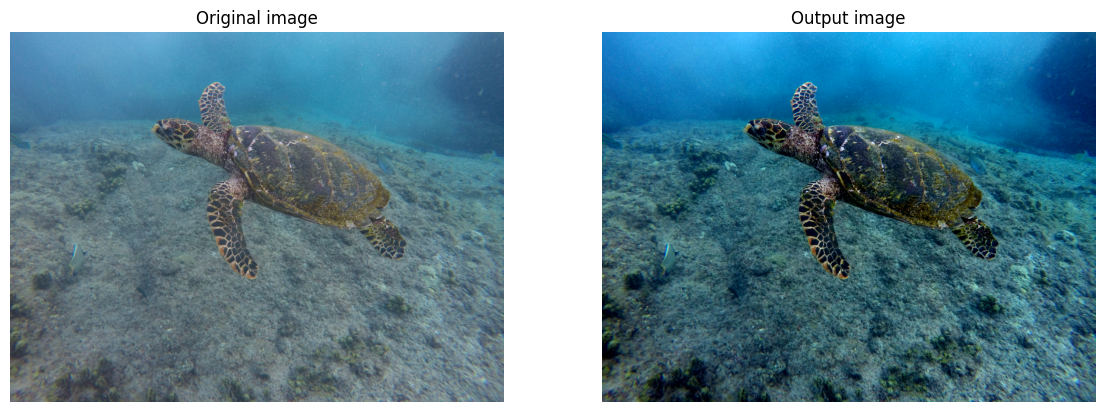

In [32]:
import matplotlib.pyplot as plt
import cv2

# Load the two images
rgb_im = cv2.imread("download (3).png")
out_im = cv2.imread("download (4).png")
# Convert images to RGB format
rgb_im = cv2.cvtColor(rgb_im, cv2.COLOR_BGR2RGB)
out_im = cv2.cvtColor(out_im, cv2.COLOR_BGR2RGB)

# Plot the images
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
ax[0].imshow(rgb_im)
ax[0].axis("off")
ax[0].set_title("Original image")

ax[1].imshow(out_im)
ax[1].axis("off")
ax[1].set_title("Output image")

plt.show()


## conclusion

1. The model works preety good with low light images.
2. We have used CNN to train the model with a relistic low light image although it is not tested for other type of noises.
